In [11]:
import numpy as np
import pandas as pd

import json
import tweepy
from tweepy import OAuthHandler, API, Stream
import string
import re
import matplotlib.pyplot as plt

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from textblob import TextBlob
from wordcloud import WordCloud
from PIL import Image
from collections import Counter
import string
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV

import xgboost as xgb
import lightgbm as lgb
import tweepy
from tweepy import Cursor
import unicodecsv
from unidecode import unidecode

In [12]:
# Consumer API keys
API_key        = ''
API_secret_key = ''

# Access token & access token secret
Access_token        = ''
Access_token_secret = ''

auth = OAuthHandler(API_key, API_secret_key)
auth.set_access_token(Access_token, Access_token_secret)
api = API(auth)

In [13]:

kj_tweets = api.user_timeline(screen_name= "kejames", count= 5000, include_rts= True, tweet_mode = "extended")
print("Number of tweets of Dr. Karen James extracted: {}.\n".format(len(kj_tweets)))


Ct_tweets = api.user_timeline(screen_name= "CaulfieldTim", count= 5000, include_rts= True, tweet_mode= 'extended')
print("Number of tweets of Timothy Caulfield extracted: {}.\n".format(len(Ct_tweets)))


Number of tweets of Dr. Karen James extracted: 200.

Number of tweets of Timothy Caulfield extracted: 200.



In [16]:
# Initiate lists to hole the extracted information
tw_ID_List = []
tw_USER_List = []
tw_Data_Created = []
tw_TWEET_TXT_List = []
tw_FAV_Count_List = []
tw_RETWEET_Count_List = []

# Function to extract the information
def fillin_tweets(tweets_obj, user):
    try:
        for tw in tweets_obj:
            tw_ID_List.append(tw.id)
            tw_USER_List.append(user)
            tw_Data_Created.append(tw.created_at)
            tw_TWEET_TXT_List.append(tw.full_text)
            tw_FAV_Count_List.append(tw.favorite_count)
            tw_RETWEET_Count_List.append(tw.retweet_count)
    except:
        tw_ID_List.append(np.nan)
        tw_USER_List.append(user)
        tw_Data_Created.append(np.nan)
        tw_TWEET_TXT_List.append(np.nan)
        tw_FAV_Count_List.append(np.nan)
        tw_RETWEET_Count_List.append(np.nan)

# Extract the information
fillin_tweets(tweets_obj= kj_tweets, user= 'Dr. Karen James')
fillin_tweets(tweets_obj= Ct_tweets, user= 'Timothy Caulfield')

# Create dictionary of the extracted information
dict_dataframe = {  'id': tw_ID_List,
                    'user': tw_USER_List, 
                    'date': tw_Data_Created,
                    'text': tw_TWEET_TXT_List,
                    'favorite_counts': tw_FAV_Count_List,
                    'retweet_counts': tw_RETWEET_Count_List  }

# Create dataframe from the created dictionary
df = pd.DataFrame(dict_dataframe)

# Save dataframe into CSV file
df.to_csv('Karen_Timothy_Tweets2.csv')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [6]:
# Load CSV file
df_tweets = pd.read_csv('Karen_Timothy_Tweets2.csv')

# Display the first few rows to understand your data
df_tweets.head(10)

,Unnamed: 0,id,user,date,text,favorite_counts,retweet_counts
0,0,1522557643470086147,Dr. Karen James,2022-05-06 12:43:24+00:00,RT @artefactors: A Dundee library is lending gardening tools to get people out into the fresh air after lockdowns.\n#libraries\nhttps://t.co/…,0,7
1,1,1522433543833636865,Dr. Karen James,2022-05-06 04:30:16+00:00,RT @politico: Karine Jean-Pierre will be the new White House Press Secretary. She will be the first Black press secretary in history and th…,0,83
2,2,1522389579868876802,Dr. Karen James,2022-05-06 01:35:35+00:00,@spacermase @AcadiaNPS I never had them growing up out west but now I can’t imagine spring without them.,1,0
3,3,1522384086307905537,Dr. Karen James,2022-05-06 01:13:45+00:00,@birdturntable These nest under our porch every year 🥰,2,0
4,4,1522374485592137729,Dr. Karen James,2022-05-06 00:35:36+00:00,"A beaver swimming along the edge of a flooded Duck Brook in ⁦@AcadiaNPS⁩, within sight of its lodge. Bonus: You can hear the peepers (Pseudacris crucifer) singing. https://t.co/2d1P1uXfhQ",27,4
5,5,1522258805387673600,Dr. Karen James,2022-05-05 16:55:56+00:00,"@JoshRosenau @OrinKerr This, and it also isn’t “deeply divided” when it shows 80% of Americans support legal abortion in at least some circumstances.",0,0
6,6,1522257881327968256,Dr. Karen James,2022-05-05 16:52:15+00:00,@OrinKerr “Deeply divided” https://t.co/NecE6BoNMB,0,0
7,7,1522257271140589568,Dr. Karen James,2022-05-05 16:49:50+00:00,Lolsob https://t.co/8mpMqjMxpM,4,0
8,8,1521942529893179393,Dr. Karen James,2022-05-04 19:59:10+00:00,"@Daniel_Red_Eire I think that’s Old Faithful, which is in Yellowstone, not Yosemite. 🤓",3,0
9,9,1521940507542396940,Dr. Karen James,2022-05-04 19:51:07+00:00,"RT @KerrieDoodles: My local Wild Garlic patch, taken this morning. I wish I could share the scent, it was delicious! https://t.co/Q9baey80zr",0,401


In [7]:
# Check null values
df_tweets.isnull().sum()

Unnamed: 0         0
id                 0
user               0
date               0
text               0
favorite_counts    0
retweet_counts     0
dtype: int64

In [8]:
# To avoid displaying scientific numbers like '9.500000e+01'
pd.options.display.float_format = '{:20,.2f}'.format

In [9]:
# Default method will display numeric features only
df_tweets.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,400.00,199.50,115.61,0.00,99.75,199.50,299.25,399.00
id,400.00,"1,519,653,863,068,804,608.00","1,651,091,740,148,761.00","1,516,925,935,227,920,384.00","1,518,479,732,674,806,784.00","1,519,434,157,004,410,624.00","1,521,310,420,280,210,432.00","1,522,557,643,470,086,144.00"
favorite_counts,400.00,17.44,43.07,0.00,0.00,3.00,16.00,439.00
retweet_counts,400.00,195.90,"1,339.93",0.00,0.00,3.00,13.00,"23,450.00"


In [10]:
# Using include=['O'] to display categorical features
df_tweets.describe(include=['O']).T

,count,unique,top,freq
user,400,2,Dr. Karen James,200
date,400,400,2022-05-06 12:43:24+00:00,1
text,400,400,RT @artefactors: A Dundee library is lending gardening tools to get people out into the fresh air after lockdowns.\n#libraries\nhttps://t.co/…,1


In [11]:
# Tweets shares
df_tweets.user.value_counts(normalize = True).round(3) * 100

Dr. Karen James                    50.00
Timothy Caulfield                  50.00
Name: user, dtype: float64

In [12]:
# Remove URLs from the tweets
def re_remove_url(x):
    return re.sub(r'http\S+', '', x)

#Extracts hashtags from tweets
def extract_hashtags(x):
    try:
        hashtags = re.findall(r"#(\w+)", x) # Extract hashtags
        if not hashtags:
            return np.nan
        elif isinstance(hashtags, list): # Check if it's a list object
            return ', '.join(hashtags) # Convert the list to str object
        else:
            return hashtags
    except:
        return np.nan
     
#Extracts mentions from tweets
def extract_mentions(x):
    try:
        mentions = re.findall(r"@(\w+)", x) # Extract mentions
        if not mentions:
            return np.nan
        if isinstance(mentions, list):
            return ', '.join(mentions)
        else:
            return mentions
    except:
        return np.nan

# Add exctracted data in new columns
df_tweets['tweets']   = df_tweets.text.apply(lambda x: re_remove_url(x))
df_tweets['hashtags'] = df_tweets.text.apply(lambda x: extract_hashtags(x))
df_tweets['mentions'] = df_tweets.text.apply(lambda x: extract_mentions(x))

# Drop unwanted columns
df_tweets.drop(['text', 'Unnamed: 0'], axis = 1, inplace = True)

In [13]:
# Extract additional information about the tweets
tweets_length_list           = []
tweets_spaces_list           = []
tweets_uppercase_list        = []
tweets_punctuations_list     = []
tweets_questionmark_list     = []
tweets_exclamation_mark_list = []

def extract_text_details(x):
    tweets_length_list.append(len(x))                                                 # Length of the tweet
    tweets_spaces_list.append(sum([1 for l in x if l.isspace()]))                     # Total number of spaces exists in the tweet
    tweets_uppercase_list.append(sum([1 for l in x if l.isupper()]))                  # Total number of uppercases used in the tweet
    tweets_punctuations_list.append(sum([1 for l in x if l in string.punctuation]))   # Total number of punctuation exists in the tweet
    tweets_questionmark_list.append(x.count('?'))                                     # Total number of question marks in tweet 
    tweets_exclamation_mark_list.append(x.count('!'))                                 # Total number of exclamation marks in tweet

_ = df_tweets.tweets.apply(lambda x: extract_text_details(x)) # Since the function doesnt return values, it returns 'None' by default. Instead of displaying them, I stored them in temp object '_'
del _ # Delete _ object

df_tweets['tweets_length']           = tweets_length_list
df_tweets['tweets_spaces']           = tweets_spaces_list
df_tweets['tweets_uppercase']        = tweets_uppercase_list
df_tweets['tweets_punctuations']     = tweets_punctuations_list
df_tweets['tweets_questionmark']     = tweets_questionmark_list
df_tweets['tweets_exclamation_mark'] = tweets_exclamation_mark_list

In [14]:
# Extract polarity and subjectivity of the tweets 
polarity_list     = []
subjectivity_list = []

def polarity_subjectivity(x):
    analysis = TextBlob(x)
    polarity_list.append(round(analysis.polarity, 2))
    subjectivity_list.append(round(analysis.subjectivity, 2))
    
_ = df_tweets.tweets.apply(lambda x: polarity_subjectivity(x))
del _

df_tweets['polarity']     = polarity_list
df_tweets['subjectivity'] = subjectivity_list

In [15]:
# Very Positive / Positive / Very Negative / Negative / Neutral
def polarity_status(x):
    if x == 0:
        return 'Neutral'
    elif x > 0.00 and x < 0.50:
        return 'Positive'
    elif x >= 0.50:
        return 'Very Positive'
    elif x < 0.00 and x > -0.50:
        return 'Negative'
    elif x <= -0.50:
        return 'Very Negative'
    else:
        return 'Unknown'

# Very Positive / Positive / Very Negative / Negative / Neutral
def subjectivity_status(x):
    if x == 0:
        return 'Very Objective'
    elif x > 0.00 and x < 0.40:
        return 'Objective'
    elif x >= 0.40 and x < 0.70:
        return 'Subjective'
    elif x >= 0.70:
        return 'Very Subjective'

# Extract / Classify polarity and subjectivity
df_tweets['polarity_status'] = df_tweets.polarity.apply(lambda x: polarity_status(x))
df_tweets['subjectivity_status'] = df_tweets.subjectivity.apply(lambda x: subjectivity_status(x))
# Positive / Negative / Neutral numeric
# Very Positive and Positive are going to be ['is_positive']
neutral_list  = []
positive_list = []
negative_list = []

def polarity_status(x):
    if x == 0:
        neutral_list.append(1)
        positive_list.append(0)
        negative_list.append(0)
    elif x > 0.00:
        neutral_list.append(0)
        positive_list.append(1)
        negative_list.append(0)
    elif x < 0.00:
        neutral_list.append(0)
        positive_list.append(0)
        negative_list.append(1)
    
_ = df_tweets.polarity.apply(lambda x: polarity_status(x))
del _

df_tweets['is_neutral']  = neutral_list
df_tweets['is_positive'] = positive_list
df_tweets['is_negative'] = negative_list

In [16]:
# Convert [date] feature type to datetime type inorder to manipulate dates and times 
df_tweets.date = pd.to_datetime(df_tweets.date)

In [17]:
# Extract tweeting times [early, morning, noon, evening, midnight]
early_list    = []
morning_list  = []
noon_list     = []
evening_list  = []
midnight_list = []

def part_of_the_day(x):
    try:
        if x >= 5: 
            early_list.append(1)
            morning_list.append(0)
            noon_list.append(0)
            evening_list.append(0)
            midnight_list.append(0)
            return 'Early Morning'

        elif x >= 8: 
            early_list.append(0)
            morning_list.append(1)
            noon_list.append(0)
            evening_list.append(0)
            midnight_list.append(0)
            return 'Morning'

        elif x >= 12: 
            early_list.append(0)
            morning_list.append(0)
            noon_list.append(1)
            evening_list.append(0)
            midnight_list.append(0)
            return 'Afternoon'

        elif x >= 18: 
            early_list.append(0)
            morning_list.append(0)
            noon_list.append(0)
            evening_list.append(1)
            midnight_list.append(0)
            return 'Evening'

        elif x >= 0 and x < 5:
            early_list.append(0)
            morning_list.append(0)
            noon_list.append(0)
            evening_list.append(0)
            midnight_list.append(1)
            return 'Mid Night'
    except:
        early_list.append(np.nan)
        morning_list.append(np.nan)
        noon_list.append(np.nan)
        evening_list.append(np.nan)
        midnight_list.append(np.nan)
        return np.nan
    
df_tweets['part_of_day'] = df_tweets.date.dt.hour.apply(lambda x: part_of_the_day(x))

df_tweets['is_early']    = early_list
df_tweets['is_morning']  = morning_list
df_tweets['is_noon']     = noon_list
df_tweets['is_evening']  = evening_list
df_tweets['is_midnight'] = midnight_list 

In [18]:
# Initiate nlp object. If the below did not run successfully, replace the 'en' with 'en_core_web_sm'
import en_core_web_sm

nlp = spacy.load("en_core_web_sm")

In [19]:
is_norp_list    = []  # Nationalities or religious or political groups.
is_time_list    = []
is_org_list     = []  # Companies, agencies, institutions, etc.
is_gpe_list     = []  # Countries, cities, states.
is_loc_list     = []  # Non-GPE locations, mountain ranges, bodies of water.
is_product_list = []    
is_workart_list = []  # Titles of books, songs, etc.
is_fac_list     = []  # Buildings, airports, highways, bridges, etc.

is_noun_list    = []  # girl, cat, tree, air, beauty
is_pron_list    = []  # I, you, he, she, myself, themselves, somebody
is_adv_list     = []  # very, tomorrow, down, where, there
is_propn_list   = []  # Mary, John, London, NATO, HBO
is_verb_list    = []   
is_intj_list    = []  # psst, ouch, bravo, hello

def extract_tweet_style(x):
    
    doc = nlp(x)
    
    is_norp_list.append(sum([1 for i in doc.ents if i.label_ == 'NORP']))
    is_time_list.append(sum([1 for i in doc.ents if i.label_ == 'TIME']))
    is_org_list.append(sum([1 for i in doc.ents if i.label_ == 'ORG']))
    is_gpe_list.append(sum([1 for i in doc.ents if i.label_ == 'GPE']))
    is_loc_list.append(sum([1 for i in doc.ents if i.label_ == 'LOC']))
    is_product_list.append(sum([1 for i in doc.ents if i.label_ == 'PRODUCT']))
    is_workart_list.append(sum([1 for i in doc.ents if i.label_ == 'WORK_OF_ART']))
    is_fac_list.append(sum([1 for i in doc.ents if i.label_ == 'FAC']))

    is_noun_list.append((sum([1 for i in doc if i.pos_ == 'NOUN'])))
    is_pron_list.append((sum([1 for i in doc if i.pos_ == 'PRON'])))
    is_adv_list.append((sum([1 for i in doc if i.pos_ == 'ADV'])))
    is_propn_list.append((sum([1 for i in doc if i.pos_ == 'PROPN'])))
    is_verb_list.append((sum([1 for i in doc if i.pos_ == 'VERB'])))
    is_intj_list.append((sum([1 for i in doc if i.pos_ == 'INTJ'])))


_ = df_tweets.tweets.apply(lambda x: extract_tweet_style(x))
del _
                   
df_tweets['is_norp']     = is_norp_list
df_tweets['is_time']     = is_time_list
df_tweets['is_org']      = is_org_list
df_tweets['is_gpe']      = is_gpe_list
df_tweets['is_loc']      = is_loc_list
df_tweets['is_product']  = is_product_list
df_tweets['is_workart']  = is_workart_list
df_tweets['is_fac']      = is_fac_list

df_tweets['is_noun']     = is_noun_list
df_tweets['is_pron']     = is_pron_list
df_tweets['is_adv']      = is_adv_list
df_tweets['is_propn']    = is_propn_list
df_tweets['is_verb']     = is_verb_list
df_tweets['is_intj']     = is_intj_list

In [20]:
# This is the describtion of the new numeric features
df_tweets.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.00,"1,519,653,863,068,804,608.00","1,651,091,740,148,761.00","1,516,925,935,227,920,384.00","1,518,479,732,674,806,784.00","1,519,434,157,004,410,880.00","1,521,310,420,280,210,432.00","1,522,557,643,470,086,144.00"
favorite_counts,400.00,17.44,43.07,0.00,0.00,3.00,16.00,439.00
retweet_counts,400.00,195.90,"1,339.93",0.00,0.00,3.00,13.00,"23,450.00"
tweets_length,400.00,144.84,83.24,2.00,75.00,140.00,221.25,432.00
tweets_spaces,400.00,22.29,13.60,1.00,11.00,22.00,34.00,57.00
tweets_uppercase,400.00,8.03,6.71,0.00,3.00,6.00,11.00,65.00
tweets_punctuations,400.00,7.29,5.15,0.00,3.00,6.00,10.00,27.00
tweets_questionmark,400.00,0.14,0.44,0.00,0.00,0.00,0.00,4.00
tweets_exclamation_mark,400.00,0.26,0.62,0.00,0.00,0.00,0.00,4.00
polarity,400.00,0.10,0.26,-0.80,0.00,0.00,0.24,1.00


In [21]:
# This is the describtion of the objects (string) features
df_tweets.describe(include=['O']).T

,count,unique,top,freq
user,400,2,Dr. Karen James,200
tweets,400,400,RT @artefactors: A Dundee library is lending gardening tools to get people out into the fresh air after lockdowns.\n#libraries\n,1
hashtags,98,77,Outlander,4
mentions,311,251,jonathanstea,8
polarity_status,400,5,Positive,159
subjectivity_status,400,4,Subjective,146
part_of_day,400,2,Early Morning,310


In [22]:
df_tweets.groupby(['user']).agg({    'is_norp': 'sum',
                                     'is_time': 'sum',
                                     'is_org': 'sum',
                                     'is_gpe': 'sum',
                                     'is_loc': 'sum',
                                     'is_product': 'sum',
                                     'is_workart': 'sum',
                                     'is_fac': 'sum',
                                     'is_noun': 'sum',
                                     'is_pron': 'sum',
                                     'is_adv': 'sum',
                                     'is_propn': 'sum',
                                     'is_verb': 'sum',
                                     'is_intj': 'sum'  })

,is_norp,is_time,is_org,is_gpe,is_loc,is_product,is_workart,is_fac,is_noun,is_pron,is_adv,is_propn,is_verb,is_intj
user,,,,,,,,,,,,,,
Dr. Karen James,11,3,50,22,7,2,3,0,674,450,231,390,470,38
Timothy Caulfield,18,3,118,27,0,10,11,1,1329,295,204,764,583,23


In [23]:
df_tweets.to_csv('Karen_Timothy_Tweets2_Detailed.csv')
df_tweets.to_pickle('Karen_Timothy_Tweets2_Detailed.pickle')

In [24]:
sns.set_style('darkgrid')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)

nlp = spacy.load('en_core_web_sm')

In [25]:
df = pd.read_pickle('Karen_Timothy_Tweets2_Detailed.pickle')
df[:-2]

,id,user,date,favorite_counts,retweet_counts,tweets,hashtags,mentions,tweets_length,tweets_spaces,tweets_uppercase,tweets_punctuations,tweets_questionmark,tweets_exclamation_mark,polarity,subjectivity,polarity_status,subjectivity_status,is_neutral,is_positive,is_negative,part_of_day,is_early,is_morning,is_noon,is_evening,is_midnight,is_norp,is_time,is_org,is_gpe,is_loc,is_product,is_workart,is_fac,is_noun,is_pron,is_adv,is_propn,is_verb,is_intj
0,1522557643470086147,Dr. Karen James,2022-05-06 12:43:24+00:00,0,7,RT @artefactors: A Dundee library is lending gardening tools to get people out into the fresh air after lockdowns.\n#libraries\n,libraries,artefactors,126,20,4,4,0,0,0.30,0.50,Positive,Subjective,0,1,0,Early Morning,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,4,2,0
1,1522433543833636865,Dr. Karen James,2022-05-06 04:30:16+00:00,0,83,RT @politico: Karine Jean-Pierre will be the new White House Press Secretary. She will be the first Black press secretary in history and th…,NaN,politico,140,23,11,4,0,0,0.05,0.31,Positive,Objective,0,1,0,Mid Night,0,0,0,0,1,0,0,2,0,0,0,0,0,4,1,0,10,0,0
2,1522389579868876802,Dr. Karen James,2022-05-06 01:35:35+00:00,1,0,@spacermase @AcadiaNPS I never had them growing up out west but now I can’t imagine spring without them.,NaN,"spacermase, AcadiaNPS",104,17,6,3,0,0,0.00,0.00,Neutral,Very Objective,1,0,0,Mid Night,0,0,0,0,1,0,0,0,0,0,0,0,0,3,4,3,0,3,0
3,1522384086307905537,Dr. Karen James,2022-05-06 01:13:45+00:00,2,0,@birdturntable These nest under our porch every year 🥰,NaN,birdturntable,54,8,1,1,0,0,0.00,0.00,Neutral,Very Objective,1,0,0,Mid Night,0,0,0,0,1,0,0,0,0,0,0,0,0,3,1,0,0,1,0
4,1522374485592137729,Dr. Karen James,2022-05-06 00:35:36+00:00,27,4,"A beaver swimming along the edge of a flooded Duck Brook in ⁦@AcadiaNPS⁩, within sight of its lodge. Bonus: You can hear the peepers (Pseudacris crucifer) singing.",NaN,AcadiaNPS,164,27,10,7,0,0,0.00,0.00,Neutral,Very Objective,1,0,0,Mid Night,0,0,0,0,1,1,0,0,0,0,0,0,0,10,2,0,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1517263669913997312,Timothy Caulfield,2022-04-21 22:07:02+00:00,32,8,"#IntermittentFasting Strikes Out Again #weightloss #diet\n\n@ConscienHealth: ""The best strategy is to find a healthy pattern of eating that you can enjoy and keep following over time. Don’t expect miracles...""\n\nYep. No magic. #healthylifestyle","IntermittentFasting, weightloss, diet, healthylifestyle",ConscienHealth,242,36,11,14,0,0,0.33,0.48,Positive,Subjective,0,1,0,Early Morning,1,0,0,0,0,0,0,0,0,0,0,0,0,7,1,1,4,7,0
394,1517260127354511360,Timothy Caulfield,2022-04-21 21:52:58+00:00,39,8,"Scientists Find No Benefit to Time-Restricted Eating by @ginakolata \n\nStudy: ""not more beneficial with regard to reduction in body weight, body fat, etc.""\n\nYet again, NO magical #diet! Best diet: healthy, sustainable, and works for you. \n\n#healthylifestyle","diet, healthylifestyle",ginakolata,257,42,12,16,0,1,0.23,0.57,Positive,Subjective,0,1,0,Early Morning,1,0,0,0,0,0,0,1,0,0,0,0,0,12,1,2,5,2,0
395,1517254303114665984,Timothy Caulfield,2022-04-21 21:29:49+00:00,0,13,"RT @CaulfieldTim: Just heard it suggested on @TheLeadCNN @jaketapper politicians who were against mask/vaccine mandates were on ""the right…",NaN,"CaulfieldTim, TheLeadCNN, jaketapper",139,18,10,6,0,0,0.00,0.00,Neutral,Very Objective,1,0,0,Early Morning,1,0,0,0,0,0,0,1,0,0,0,0,0,3,2,1,5,2,0
396,1517249782883880960,Timothy Caulfield,2022-04-21 21:11:52+00:00,8,2,*Exiting. #TypoKing👑,TypoKing,NaN,20,1,3,3,0,0,0.00,0.00,Neutral,Very Objective,1,0,0,Early Morning,1,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0


In [26]:
pd.DataFrame(df.dtypes).transpose()
df.dtypes

id                                       int64
user                                    object
date                       datetime64[ns, UTC]
favorite_counts                          int64
retweet_counts                           int64
tweets                                  object
hashtags                                object
mentions                                object
tweets_length                            int64
tweets_spaces                            int64
tweets_uppercase                         int64
tweets_punctuations                      int64
tweets_questionmark                      int64
tweets_exclamation_mark                  int64
polarity                               float64
subjectivity                           float64
polarity_status                         object
subjectivity_status                     object
is_neutral                               int64
is_positive                              int64
is_negative                              int64
part_of_day  

In [27]:
df.date = pd.to_datetime(df.date)

In [28]:
# Extract months, week days, days 
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['week_day'] = df.date.dt.weekday # Weekday as number
df['week_day_name'] = df.date.dt.day_name() # Weekday as text
df['hour'] = df.date.dt.hour

In [29]:
df.head(5)

,id,user,date,favorite_counts,retweet_counts,tweets,hashtags,mentions,tweets_length,tweets_spaces,tweets_uppercase,tweets_punctuations,tweets_questionmark,tweets_exclamation_mark,polarity,subjectivity,polarity_status,subjectivity_status,is_neutral,is_positive,is_negative,part_of_day,is_early,is_morning,is_noon,is_evening,is_midnight,is_norp,is_time,is_org,is_gpe,is_loc,is_product,is_workart,is_fac,is_noun,is_pron,is_adv,is_propn,is_verb,is_intj,month,day,week_day,week_day_name,hour
0,1522557643470086147,Dr. Karen James,2022-05-06 12:43:24+00:00,0,7,RT @artefactors: A Dundee library is lending gardening tools to get people out into the fresh air after lockdowns.\n#libraries\n,libraries,artefactors,126,20,4,4,0,0,0.30,0.50,Positive,Subjective,0,1,0,Early Morning,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,4,2,0,5,6,4,Friday,12
1,1522433543833636865,Dr. Karen James,2022-05-06 04:30:16+00:00,0,83,RT @politico: Karine Jean-Pierre will be the new White House Press Secretary. She will be the first Black press secretary in history and th…,NaN,politico,140,23,11,4,0,0,0.05,0.31,Positive,Objective,0,1,0,Mid Night,0,0,0,0,1,0,0,2,0,0,0,0,0,4,1,0,10,0,0,5,6,4,Friday,4
2,1522389579868876802,Dr. Karen James,2022-05-06 01:35:35+00:00,1,0,@spacermase @AcadiaNPS I never had them growing up out west but now I can’t imagine spring without them.,NaN,"spacermase, AcadiaNPS",104,17,6,3,0,0,0.00,0.00,Neutral,Very Objective,1,0,0,Mid Night,0,0,0,0,1,0,0,0,0,0,0,0,0,3,4,3,0,3,0,5,6,4,Friday,1
3,1522384086307905537,Dr. Karen James,2022-05-06 01:13:45+00:00,2,0,@birdturntable These nest under our porch every year 🥰,NaN,birdturntable,54,8,1,1,0,0,0.00,0.00,Neutral,Very Objective,1,0,0,Mid Night,0,0,0,0,1,0,0,0,0,0,0,0,0,3,1,0,0,1,0,5,6,4,Friday,1
4,1522374485592137729,Dr. Karen James,2022-05-06 00:35:36+00:00,27,4,"A beaver swimming along the edge of a flooded Duck Brook in ⁦@AcadiaNPS⁩, within sight of its lodge. Bonus: You can hear the peepers (Pseudacris crucifer) singing.",NaN,AcadiaNPS,164,27,10,7,0,0,0.00,0.00,Neutral,Very Objective,1,0,0,Mid Night,0,0,0,0,1,1,0,0,0,0,0,0,0,10,2,0,3,2,0,5,6,4,Friday,0


In [30]:
df.loc[(df.user == 'Dr. Karen James') & (df.polarity_status == 'Negative')]

,id,user,date,favorite_counts,retweet_counts,tweets,hashtags,mentions,tweets_length,tweets_spaces,tweets_uppercase,tweets_punctuations,tweets_questionmark,tweets_exclamation_mark,polarity,subjectivity,polarity_status,subjectivity_status,is_neutral,is_positive,is_negative,part_of_day,is_early,is_morning,is_noon,is_evening,is_midnight,is_norp,is_time,is_org,is_gpe,is_loc,is_product,is_workart,is_fac,is_noun,is_pron,is_adv,is_propn,is_verb,is_intj,month,day,week_day,week_day_name,hour
5,1522258805387673600,Dr. Karen James,2022-05-05 16:55:56+00:00,0,0,"@JoshRosenau @OrinKerr This, and it also isn’t “deeply divided” when it shows 80% of Americans support legal abortion in at least some circumstances.",NaN,"JoshRosenau, OrinKerr",149,22,6,5,0,0,-0.03,0.33,Negative,Objective,0,0,1,Early Morning,1,0,0,0,0,1,0,0,0,0,0,0,0,4,4,2,1,3,0,5,5,3,Thursday,16
15,1521892575015325697,Dr. Karen James,2022-05-04 16:40:39+00:00,4,0,@JacquelynGill I discovered yesterday that it is a lot harder for me to show up for myself than it is for me to show up for other people.,NaN,JacquelynGill,137,27,3,2,0,0,-0.11,0.19,Negative,Objective,0,0,1,Early Morning,1,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0,0,3,0,5,4,2,Wednesday,16
22,1521602473072513024,Dr. Karen James,2022-05-03 21:27:54+00:00,0,0,"@JoBrodie I wouldn’t put it past Texas, etc.",NaN,JoBrodie,44,7,4,3,0,0,-0.25,0.25,Negative,Objective,0,0,1,Early Morning,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,2,1,0,5,3,1,Tuesday,21
26,1521595927588478979,Dr. Karen James,2022-05-03 21:01:53+00:00,0,23450,RT @andreagrimes: let’s talk about\n\nSAFE SELF-MANAGED ABORTION\n\nbecause there is *no need* to trot out the fucking coat hangers today or an…,NaN,andreagrimes,140,24,25,5,0,0,-0.05,0.65,Negative,Subjective,0,0,1,Early Morning,1,0,0,0,0,0,0,0,0,0,0,0,0,5,3,0,4,5,0,5,3,1,Tuesday,21
29,1521592428754579458,Dr. Karen James,2022-05-03 20:47:59+00:00,8,0,"The leaked SCOTUS opinion seems to be celebrating public, corporal punishment (two days in the pillory!) for people who seek abortion (see thread up and down for context.)",NaN,NaN,173,29,7,7,0,1,-0.08,0.18,Negative,Objective,0,0,1,Early Morning,1,0,0,0,0,0,0,0,0,0,0,0,0,8,1,1,1,5,0,5,3,1,Tuesday,20
35,1521550307364376579,Dr. Karen James,2022-05-03 18:00:36+00:00,12,1,"What is Alito’s cutoff for “deeply rooted in history,” I wonder? The Roe vs. Wade decision was based on the Due Process Clause of the Fourteenth Amendment (1868). If that’s not “deeply rooted in history” then neither is anything that came after it. 🧐",NaN,NaN,250,43,12,7,1,0,-0.04,0.39,Negative,Objective,0,0,1,Early Morning,1,0,0,0,0,0,0,0,0,0,0,0,0,5,7,3,8,6,0,5,3,1,Tuesday,18
41,1521397853520039936,Dr. Karen James,2022-05-03 07:54:49+00:00,6,1,"Just to be clear, I’m talking about those who are coming at this solely from a place of wonky interest. If your analysis is that this is horrible, and also sets a precedent that will erode other rights as well, also horrible, please do carry on.",NaN,NaN,245,45,3,6,0,0,-0.47,0.61,Negative,Subjective,0,0,1,Early Morning,1,0,0,0,0,0,0,0,0,0,0,0,0,5,7,6,0,5,1,5,3,1,Tuesday,7
90,1519449237058162690,Dr. Karen James,2022-04-27 22:51:42+00:00,5,2,"I grew up in Colorado Springs and I… I did not know this. Wow, just… the sheer audacity, the extraction, the destruction, the appropriation of it all. I’m appalled. (But alas, not surprised.)",NaN,NaN,192,33,8,11,0,0,-0.23,0.93,Negative,Very Subjective,0,0,1,Early Morning,1,0,0,0,0,0,0,0,1,0,0,0,0,4,7,1,2,4,2,4,27,2,Wednesday,22
93,1519446444289236994,Dr. Karen James,2022-04-27 22:40:36+00:00,3,0,"@Mrs_Schwarzski @drjulie_b @ATinyGreenCell About botany nerds, duh.",NaN,"Mrs_Schwarzski, drjulie_b, ATinyGreenCell",67,6,7,7,0,0,-0.30,0.60,Negative,Subjective,0,0,1,Early Morning,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2,0,0,4,27,2,Wednesday,22
104,1519030987090538496,Dr. Karen James,2022-04-26 19:09:44+00:00,0,27,RT @JortsTheCat: @henlospacecat Just tap tap tap send my little tweets,NaN,"JortsTheCat, henlospacecat",71,11,6,3,0,0,-0.19,0.50,Negative,Subjec

In [31]:
df.loc[(df.user == 'Timothy Caulfield') & (df.polarity_status == 'Negative')]

,id,user,date,favorite_counts,retweet_counts,tweets,hashtags,mentions,tweets_length,tweets_spaces,tweets_uppercase,tweets_punctuations,tweets_questionmark,tweets_exclamation_mark,polarity,subjectivity,polarity_status,subjectivity_status,is_neutral,is_positive,is_negative,part_of_day,is_early,is_morning,is_noon,is_evening,is_midnight,is_norp,is_time,is_org,is_gpe,is_loc,is_product,is_workart,is_fac,is_noun,is_pron,is_adv,is_propn,is_verb,is_intj,month,day,week_day,week_day_name,hour
207,1522278484894052352,Timothy Caulfield,2022-05-05 18:14:08+00:00,75,20,"Vaccine skeptics &amp; anti-maskers who invoked 'my body, my choice' are now lining up to support the end of #RoeVWade by @miajankowic @businessinsider \n\nMe: ""The conceptual inconsistency would be laughable if the issues weren't so crucially important...""",RoeVWade,"miajankowic, businessinsider",256,39,6,16,0,0,-0.05,1.00,Negative,Very Subjective,0,0,1,Early Morning,1,0,0,0,0,0,0,1,0,0,0,0,0,9,4,3,4,3,0,5,5,3,Thursday,18
208,1522255600914030608,Timothy Caulfield,2022-05-05 16:43:12+00:00,20,4,"Another pandemic is inevitable, scientists say. Mass vaccination is not. by @erikaedwardsnbc \n\n@DrJulieMorita: ""If we continue to have poor acceptance of vaccines, we will see millions of lives lost in the case of another pandemic as big as this one...""",NaN,"erikaedwardsnbc, DrJulieMorita",254,42,6,12,0,0,-0.13,0.57,Negative,Subjective,0,0,1,Early Morning,1,0,0,0,0,0,0,1,0,0,0,0,0,10,2,1,2,5,0,5,5,3,Thursday,16
213,1522216197214773251,Timothy Caulfield,2022-05-05 14:06:37+00:00,0,15,"RT @ScienceUpFirst: Mental health can be complicated, and the pandemic makes it even more so. 😵‍💫\n\nWhat impact has the pandemic had on ment…",NaN,ScienceUpFirst,140,24,7,4,0,0,-0.03,0.57,Negative,Subjective,0,0,1,Early Morning,1,0,0,0,0,0,0,1,0,0,0,0,0,4,2,3,3,3,0,5,5,3,Thursday,14
219,1521987518366855168,Timothy Caulfield,2022-05-04 22:57:56+00:00,0,10,"RT @jonathanstea: Hey, don't shoot the messenger.\n\n""Trump supporters use less cognitively complex language and more simplistic modes of thi…",NaN,jonathanstea,140,20,4,6,0,0,-0.12,0.37,Negative,Objective,0,0,1,Early Morning,1,0,0,0,0,0,0,0,0,0,0,0,0,5,0,2,2,2,1,5,4,2,Wednesday,22
222,1521943689219624960,Timothy Caulfield,2022-05-04 20:03:46+00:00,35,9,"""The whacko original codes from the vaxxed meat...""?\n\n""...zombie pieces of code that come to life""?\n\nWTF? Antivaxxers think of vaccines like they have evil super powers. And the, um, ""whacko"" theories about how they can do harm?\n\nThis is a new one from a Hate Mailer.\n\nSum: Nope.",NaN,NaN,280,53,11,22,4,0,-0.24,0.80,Negative,Very Subjective,0,0,1,Early Morning,1,0,0,0,0,0,0,0,0,0,0,1,0,11,4,0,4,5,1,5,4,2,Wednesday,20
223,1521931602896449536,Timothy Caulfield,2022-05-04 19:15:44+00:00,8,0,"""...the findings of this study further suggest that shift work is also associated with worse overall health among women who survive to older ages.""\n\n via @JAMANetworkOpen @JAMANetwork",NaN,"JAMANetworkOpen, JAMANetwork",184,29,11,8,0,0,-0.06,0.36,Negative,Objective,0,0,1,Early Morning,1,0,0,0,0,0,0,0,0,0,0,0,0,8,1,2,0,3,0,5,4,2,Wednesday,19
232,1521624793799217153,Timothy Caulfield,2022-05-03 22:56:35+00:00,26,12,"Paging Dr. #Musk: Please STFU by @jodyserrano via @Gizmodo with @tylerblack32 @WFKARS cc @jonathanstea @StanKutcher\n\n@amybarnhorst: “Oh no, this is bad.”\n\nMe: #Elon_Musk noise on psychiatric meds ""can have an impact on public perception of pharmaceuticals""","Musk, Elon_Musk","jodyserrano, Gizmodo, tylerblack32, WFKARS, jonathanstea, StanKutcher, amybarnhorst",257,38,21,18,0,0,-0.35,0.37,Negative,Objective,0,0,1,Early Morning,1,0,0,0,0,0,0,3,0,0,0,0,0,8,2,0,8,2,3,5,3,1,Tuesday,22
244,1521497923883782146,Timothy Caulfield,2022-05-03 14:32:27+00:00,209,39,The pandering to his new base. The total lack of principles. The embrace of pseudoscience &amp; misinformation. \n\nHas @DrOz become one of the most insufferable figures in America? Let's hope this punchline fades from view.\n\ncc

# EDA

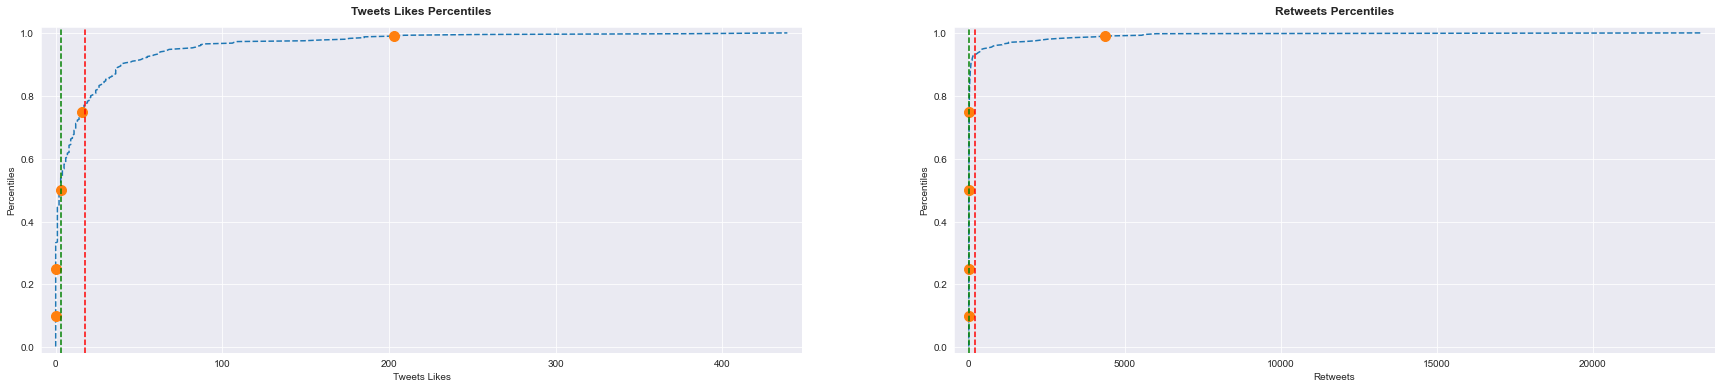

In [32]:
# ECDF Plotting with Percentiles

def eda_plot(data, cols, title, xlabel, ylabel):

    fig, ax = plt.subplots(ncols = 2, figsize= (30,6))
    
    for indx, col in enumerate(cols):

        # Preparing mean and median for both likes and retweets counts
        mean   = data[col].mean()
        median = data[col].median()

        # Tweets Likes
        percentiles      = np.array([10, 25, 50, 75, 99])
        percentiles_vars = np.percentile(data[col], percentiles)

        # Preparing points for number of likes and retweets
        x = np.sort(data[col].values)
        y = np.arange(1, len(data[col]) + 1) / len(data[col])

        # Preparing plots
        ax[indx].plot(x, y, '--')
        ax[indx].plot(percentiles_vars, percentiles / 100, marker = 'o', markersize = 10, linestyle = 'none')

        ax[indx].set_xlabel(xlabel[indx])
        ax[indx].set_ylabel(ylabel[indx])
        ax[indx].set_title(title[indx], pad = 12, weight = 'bold')

        # Display mean and median
        ax[indx].axvline(mean, color='r', linestyle='--')
        ax[indx].axvline(median, color='g', linestyle='--')

        ax[indx].margins(0.02)

    plt.show()

# Call function to plot EDA
eda_plot(data = df, 
         cols = ['favorite_counts', 'retweet_counts'],
         title = ['Tweets Likes Percentiles', 'Retweets Percentiles'], 
         xlabel = ['Tweets Likes', 'Retweets'], 
         ylabel = ['Percentiles', 'Percentiles'])

# Karen VS TIM

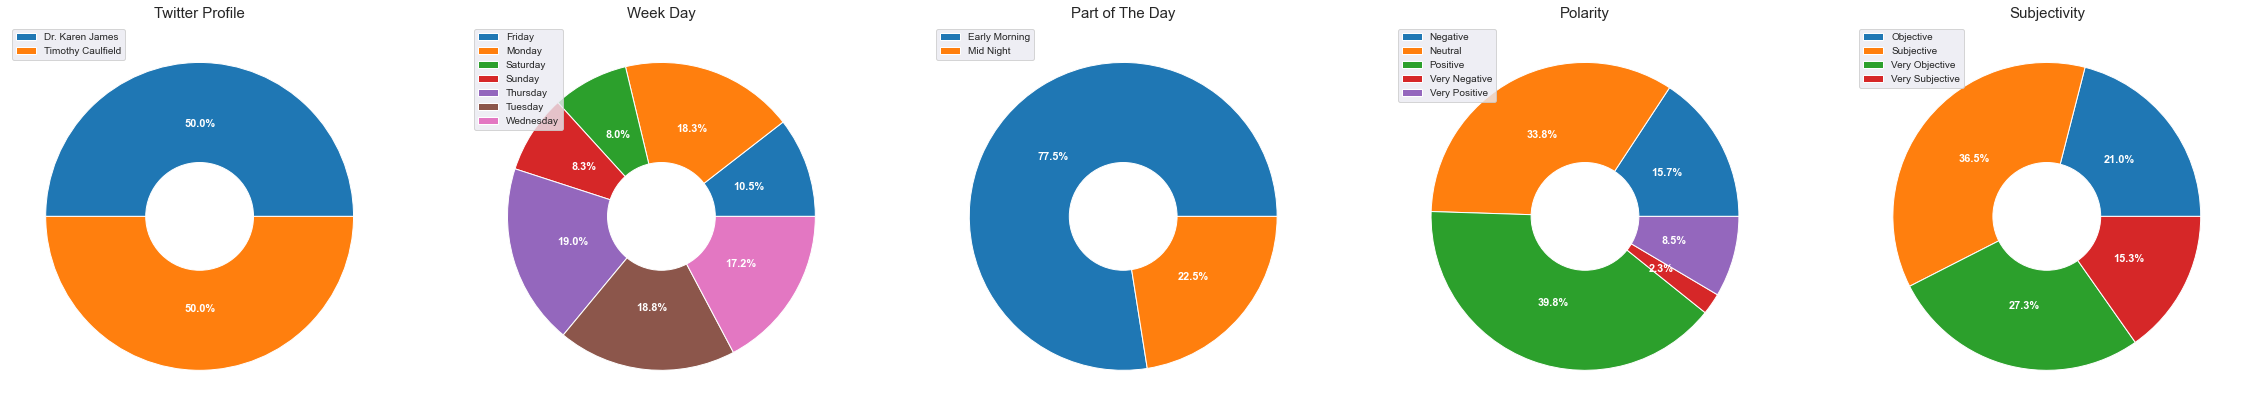

In [33]:
#General Insights
# Create Dictionaries
round1_cols      = ['user', 'week_day_name', 'part_of_day', 'polarity_status', 'subjectivity_status']
round1_titles    = ['Twitter Profile', 'Week Day', 'Part of The Day', 'Polarity', 'Subjectivity']
round1_cols_dict = dict(zip(range(0, len(round1_cols)), round1_cols))

# Create Pie Plot
fig, ax = plt.subplots(ncols = 5, figsize= (40,8))

for indx, col in round1_cols_dict.items():
    
    legend_list = df[col].value_counts(normalize = True).sort_index(ascending=True).keys().tolist()
    x = df[col].value_counts(normalize = True).sort_index(ascending=True)
    
    ax[indx].pie(data = df, x = x, autopct='%1.1f%%', textprops = {'fontsize': 11, 'color': 'w', 'weight': 'bold'})
    ax[indx].add_patch(plt.Circle((0,0), 0.35, fc = 'white'))
    
    ax[indx].legend(legend_list, loc = 2)
    ax[indx].set_title(round1_titles[indx], size = 15)

plt.show()

In [34]:
grouped = df.groupby([df.week_day_name, df.user]).size().reset_index().rename(columns = {0: 'counts'})


In [35]:
grouped.week_day_name.unique()

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [36]:
grouped.sort_index

<bound method DataFrame.sort_index of    week_day_name               user  counts
0         Friday    Dr. Karen James      17
1         Friday  Timothy Caulfield      25
2         Monday    Dr. Karen James      27
3         Monday  Timothy Caulfield      46
4       Saturday    Dr. Karen James      16
5       Saturday  Timothy Caulfield      16
6         Sunday    Dr. Karen James      27
7         Sunday  Timothy Caulfield       6
8       Thursday    Dr. Karen James      35
9       Thursday  Timothy Caulfield      41
10       Tuesday    Dr. Karen James      48
11       Tuesday  Timothy Caulfield      27
12     Wednesday    Dr. Karen James      30
13     Wednesday  Timothy Caulfield      39>

In [37]:
def annotate_perct(ax_plot, total, add_height, rot):
    '''
    Definition - 
    
    Parameters - 
        1. ax_plot: is the graph object
        2. total: is the length of the dataframe or the sum of specific column, the use of this parameter depends on the objective of the graph
        3. add_height: the additional hight added to the actual hight in order to display the annotation on top of the bar. 
        4. rot: whether to display annotation with angles by passing [i.e. 75 / 85/ 90] or horizontal as it is (the default, which is 0) 
        
    Additional Explaination - 
        Once the hight of each bar is extracted, first I check if it's null (incase theres no values for specific cases) to assign 0 for the hight otherwise, I just add the extra hight provided (if any)        
    '''
    for p in ax_plot.patches:
        if np.isnan(p.get_height()): 
            height = 0
            ax_plot.text(p.get_x() + p.get_width()/2., height, '', ha="center", va='center', fontsize=10, rotation = rot)  
        else:
            height = p.get_height()
            ax_plot.text(p.get_x() + p.get_width()/2., height + add_height, '{}  ( {}% )'.format(int(height), round((round(height / total, 3) * 100), 1)), ha="center", va='center', fontsize=10, rotation = rot)

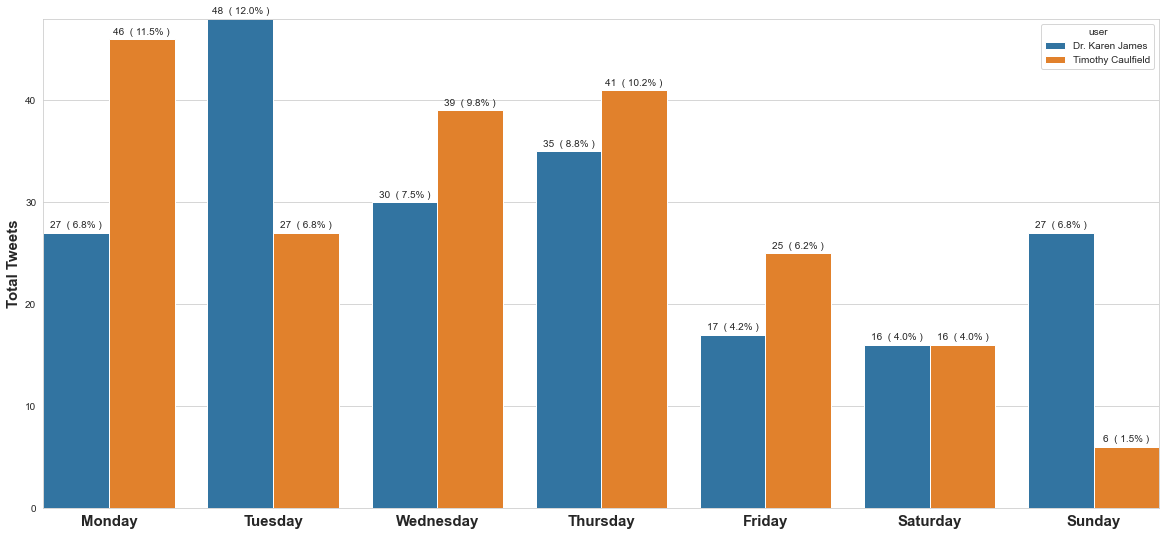

In [38]:
temp = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.set_style('whitegrid')

plt.figure(figsize = (20,9))

_ = sns.barplot(data = grouped, x = 'week_day_name', y = 'counts', hue = 'user', order = temp)
annotate_perct(ax_plot = _, add_height = 0.7, total = grouped.counts.sum(), rot= 0)

_.set_title('', pad = 40, weight= 'bold', size = 15)
_.set_xlabel('', weight= 'bold')
_.set_xticklabels(temp, rotation = 0,  weight= 'bold', fontsize = 15)
_.set_ylabel('Total Tweets', fontsize = 15, weight= 'bold')
_.margins(0)

plt.show()

# DETAILED COMPARISON

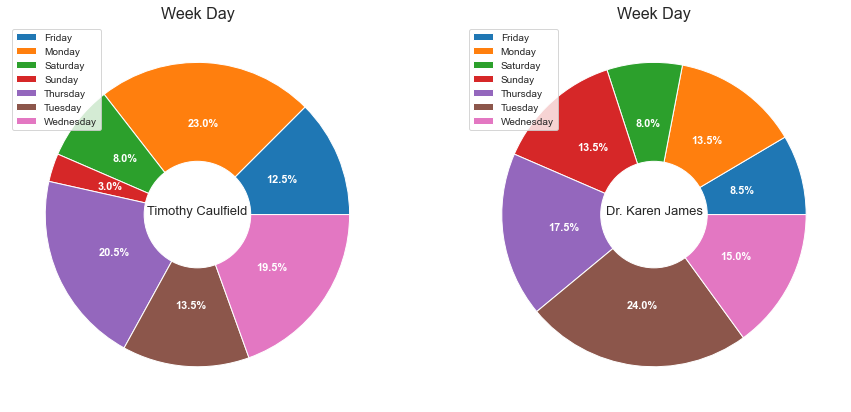

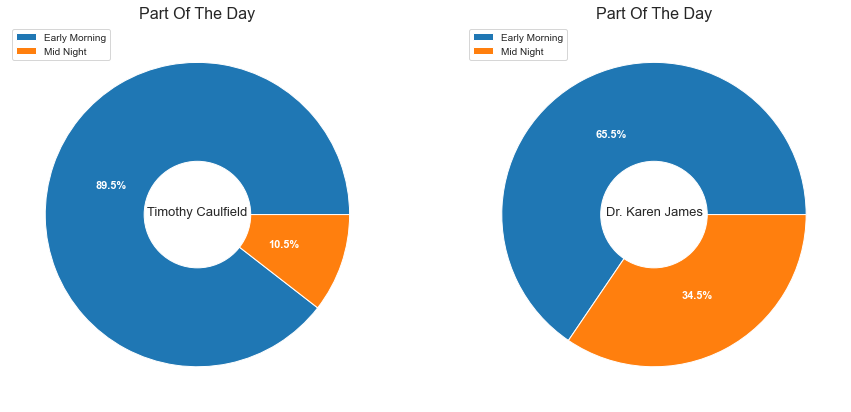

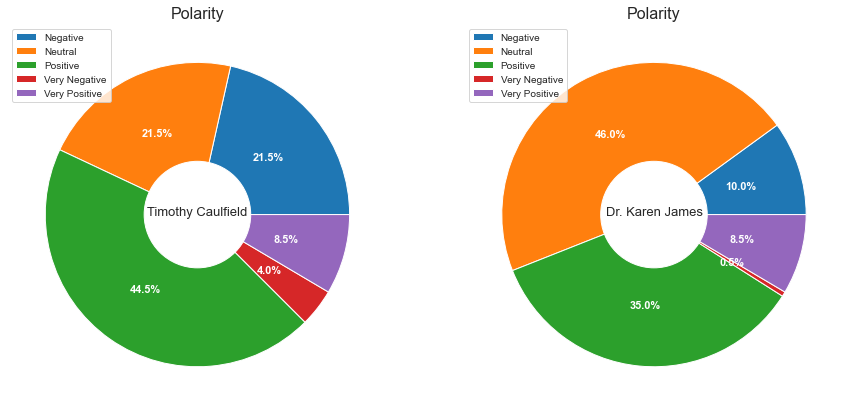

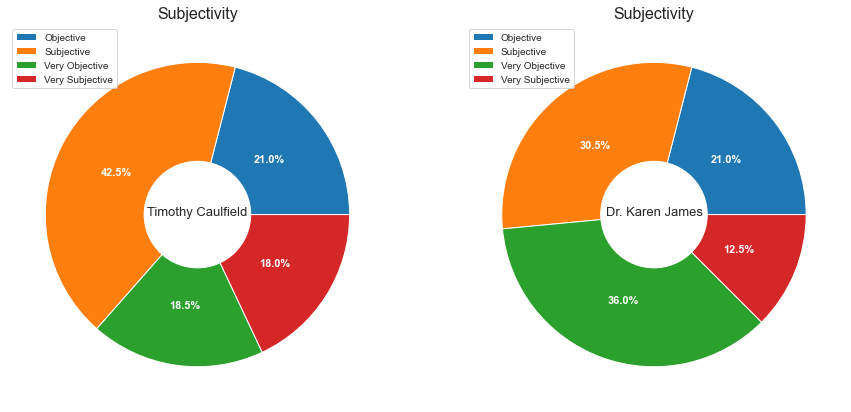

In [39]:
# Define donut_plot function
def donut_plot(data_1, data_2, target, plot_title):

    fig, ax = plt.subplots(ncols = 2, figsize= (15,7))
    
    # Data preproccessing
    x = pd.DataFrame((data_1[target].value_counts(normalize=True).sort_index() * 100).round(1).reset_index().rename(columns = {'index': 'variable', 'gender': 'churn_yes'}))
    x['karen'] = (data_2[target].value_counts(normalize=True).sort_index() * 100).round(1).values

    cols_list = x.columns[1:3]
    hue_list = x.variable.unique()

    profile_list = ['Timothy Caulfield', 'Dr. Karen James']

    for indx in range(0,2):
        # Technically its pie chart :) but I'm drawing a white circle to make them donuts!
        ax[indx].pie(data = x, x = cols_list[indx], autopct='%1.1f%%', textprops = {'fontsize': 11, 'color': 'w', 'weight': 'bold'}) 
        ax[indx].add_patch(plt.Circle((0,0), 0.35, fc = 'white'))
        label = ax[indx].annotate('{}'.format(profile_list[indx]), xy = (0, 0), fontsize = 13, ha = "center")  # weight = 'bold'
        ax[indx].legend(hue_list, loc = 2)
        ax[indx].set_title(plot_title, size = 16)
    plt.show()

# Seperate dataframe into tim and karen's dataframes
tim_df = df[df.user == 'Timothy Caulfield']
karen_df = df[df.user == 'Dr. Karen James']

# Call donut plot function for each column
for indx, col in round1_cols_dict.items():
    if indx != 0: # Avoid Twitter profile comparison
        donut_plot( data_1 = tim_df, 
                    data_2 = karen_df, 
                    target = round1_cols_dict[indx], 
                    plot_title = '{}'.format(round1_titles[indx].title()) ) # .title() to capitilize the first character

# Summary

In [40]:
# Aggregate dataframe 
summarized_df = df.groupby(['user']).agg({ 'favorite_counts': 'sum',       # Tweets overview
                                           'retweet_counts': 'sum',
                                           'is_positive': 'sum',
                                           'is_negative': 'sum',
                                          
                                           'tweets_length': 'sum',         # Tweets writing style
                                           'tweets_uppercase': 'sum',
                                           'tweets_punctuations': 'sum',
                                           'tweets_questionmark': 'sum',
                                           
                                           'is_norp': 'sum',               # Tweets detailed writing style
                                           'is_time': 'sum',
                                           'is_org': 'sum',
                                           'is_gpe': 'sum',
                                           'is_loc': 'sum',
                                           'is_product': 'sum',
                                           'is_workart': 'sum',
                                           'is_fac': 'sum',
                                           'is_noun': 'sum',
                                           'is_pron': 'sum',
                                           'is_adv': 'sum',
                                           'is_propn': 'sum',
                                           'is_verb': 'sum',
                                           'is_intj': 'sum'  }).reset_index()

# Seperate dataframe 
Tim_summarized_df = summarized_df[summarized_df.user == 'Timothy Caulfield'].drop('user', axis = 1).copy()
Keran_summarized_df = summarized_df[summarized_df.user == 'Dr. Karen James'].drop('user', axis = 1).copy()

# Get columns
summarized_cols      = Tim_summarized_df.columns

# Create features for each round in list format
round_1_cols = summarized_cols[:5]
round_2_cols = summarized_cols[5:10]
round_3_cols = summarized_cols[10:15]
round_4_cols = summarized_cols[15:20]
round_5_cols = summarized_cols[20:22]

# Combine all lists into one list
temp_list = [round_1_cols, round_2_cols, round_3_cols, round_4_cols, round_5_cols]

# Dictionary to rename the titles
rep_title_dict = {  'favorite_counts': 'Tweets Likes',
                    'retweet_counts': 'Re-Tweets',
                    'is_positive': 'Positivity',
                    'is_negative': 'Negativity',
                    'tweets_length': 'Length of Tweets',
                    'tweets_uppercase': 'Uppercase Characters Used',
                    'tweets_punctuations': 'Punctuations Used',
                    'tweets_questionmark': 'Questionmark Used',
                    'is_norp': 'Nationalities | Religious | Political Groups',
                    'is_time': 'Mentioned Time Related',
                    'is_org': 'Corporate | Governmental',
                    'is_gpe': 'Countries | Cities | States',
                    'is_loc': 'Location Mentioned',
                    'is_product': 'Objects | Vehicles | Foods',
                    'is_workart': 'Books | Songs',
                    'is_fac': 'Buildings | Airports | Highways',
                    'is_noun': 'Noun Used',
                    'is_pron': 'Pronoun Used',
                    'is_adv': 'Adverb Used',
                    'is_propn': 'Propn (like Apple, UK, US)',
                    'is_verb': 'Verb Used',
                    'is_intj': 'Bravo | Hello | Ouch' }
# Create function to plot summarized details
def summarized_donut_plot(data_1, data_2, indx_list):#, plot_title):
    
    if indx_list == 4: 
        fig, ax = plt.subplots(ncols = 2, figsize= (13,6))
    else:
        fig, ax = plt.subplots(ncols = 5, figsize= (35,6))
        
    for indx, target in enumerate(temp_list[indx_list]):

        total = df[target].sum()
    
        # Data preproccessing
        x  = round(float(data_1[target] / total * 100), 1)
        y  = round(float(data_2[target] / total * 100), 1)

        #print(total, x, y)
        
        user_list = ['Timothy Caulfield', 'Dr. Karen James']
        results_list = [x, y]

        x = pd.DataFrame(data = results_list, index = user_list)

        ax[indx].pie(x[0], autopct='%1.1f%%', textprops = {'fontsize': 10, 'color': 'w', 'weight': 'bold'})
        ax[indx].add_patch(plt.Circle((0,0), 0.35, fc = 'white'))

        ax[indx].legend(user_list, loc = 2)
        ax[indx].set_title(rep_title_dict[target], size = 10)

    plt.show()



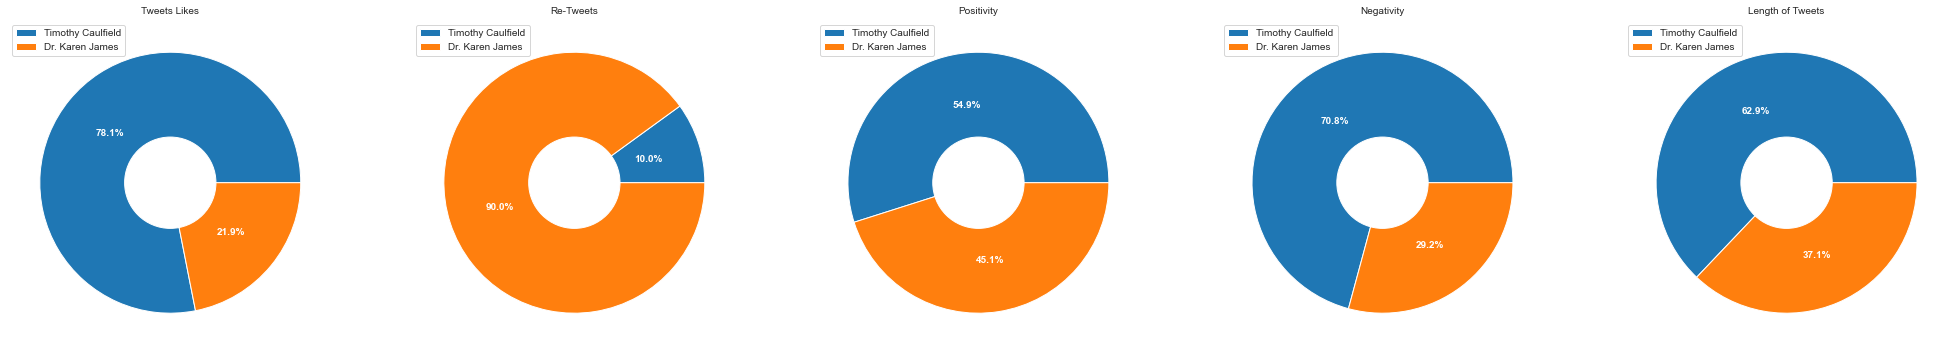

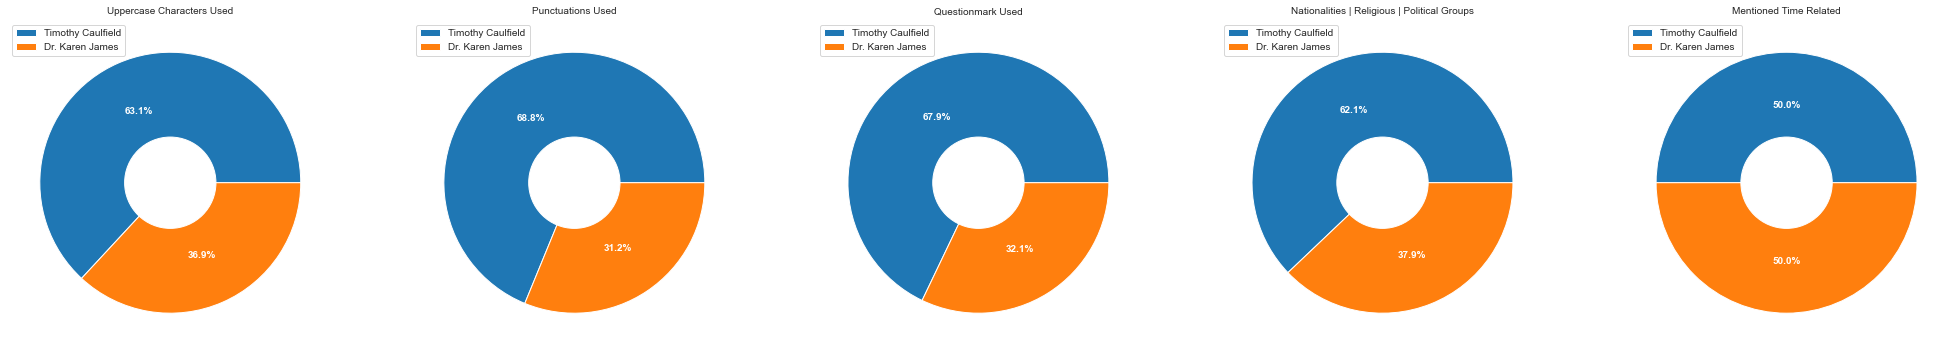

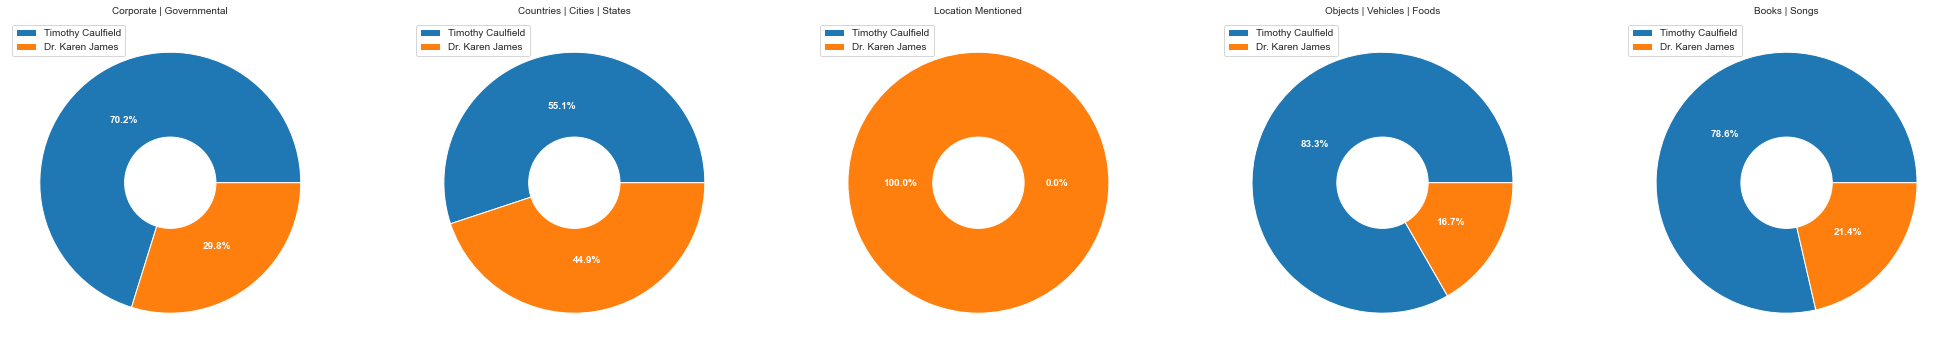

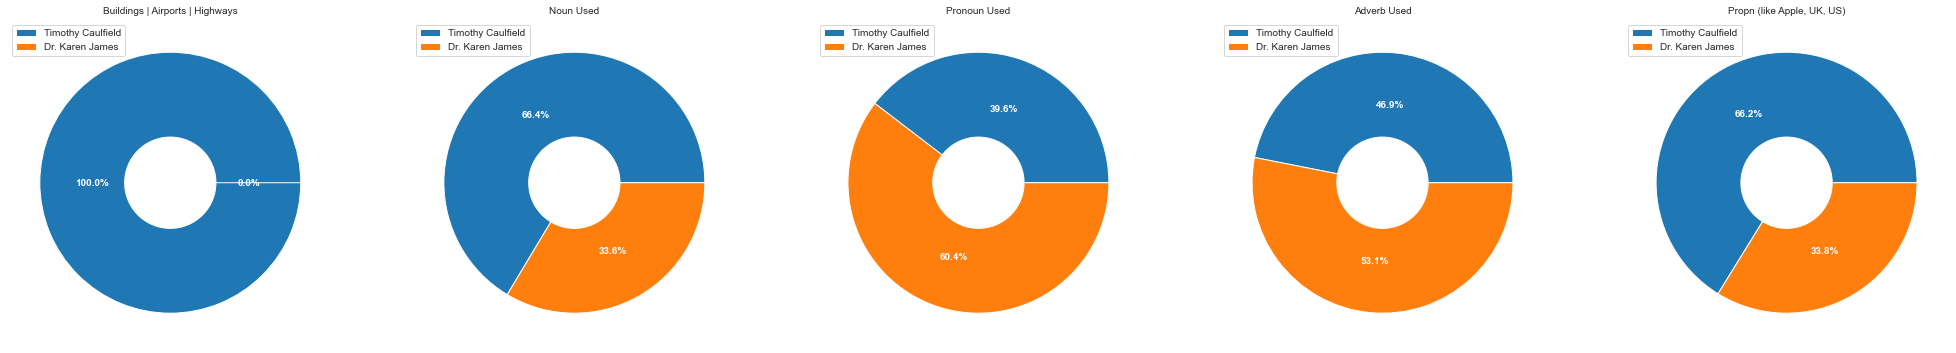

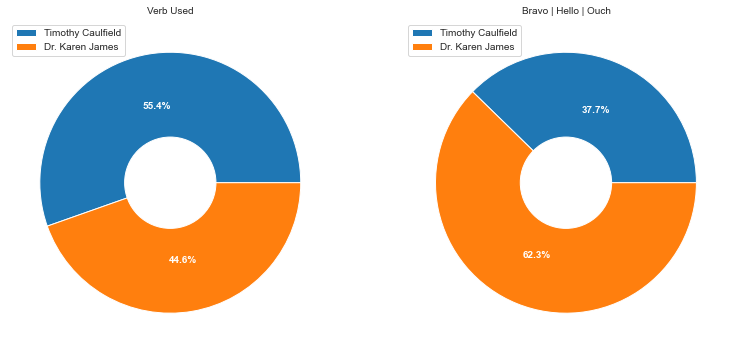

In [41]:
for indx, sublist in enumerate(temp_list):
    summarized_donut_plot( data_1 = Tim_summarized_df, 
                           data_2 = Keran_summarized_df, 
                           indx_list = indx ) 

In [42]:
# Second round of cleaning before we use spaCy
unwanted_text_list = ['“','”', 'lol', 'lmao', 'tell', 'twitter', 'list', 'whatever', 'lmfaooooooooooooooooo', 'cuz', 'ass', 'fuck', 'lmfaoo', 'wtf', 
                      'sis', 'bro', 'jajajaajajajaja', 'jajaja', 'jaja', 'haha', 'shit', 'bro', 'sis', 'dad', 'mum', 'mam', 'yaa', 'yes', 
                      'lmfao', 'like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people', 'youre', 'got', 'gonna', 'time', 'think', 
                      'yeah', 'said', 'amp', 'omg', 'lmaoo', 'don', 'bio', 'lmaoooo', 'say', 'like', 'don', 'lmfaoooo', 'lmaooo', 'boy', 
                      'lot', 'doeee', 'sir', 'nt', 'girl', 'say', 'way', 'new', 'office', 'go', 'see', 'need']

# Convert text into lowercase, remove tokens if they are in the unwated list or if they are a digit or a puncuation
def SecondRound_cleaning_tweets(x):
    tweet = ''.join([char.lower() for char in x if char not in unwanted_text_list and char.isdigit() == False and char not in string.punctuation])
    return tweet

# Store clean tweets
df['clean_tweets_SecondRound'] = df.tweets.apply(lambda x: SecondRound_cleaning_tweets(x))

In [43]:
# Way to convert the entire dataframe into percentages for better comparisons
summarized_perc_df = summarized_df.copy()

for col in summarized_perc_df.drop('user', axis = 1).columns.tolist():
    total = summarized_perc_df[col].sum()
    # Data preproccessing
    summarized_perc_df.loc[summarized_perc_df.user == 'Timothy Caulfield', col]  = round(float(summarized_perc_df.loc[summarized_perc_df.user == 'Timothy Caulfield', col] / total * 100), 1)
    summarized_perc_df.loc[summarized_perc_df.user == 'Dr. Karen James', col]  = round(float(summarized_perc_df.loc[summarized_perc_df.user == 'Dr. Karen James', col] / total * 100), 1)

# Check new dataframe
summarized_perc_df   

,user,favorite_counts,retweet_counts,is_positive,is_negative,tweets_length,tweets_uppercase,tweets_punctuations,tweets_questionmark,is_norp,is_time,is_org,is_gpe,is_loc,is_product,is_workart,is_fac,is_noun,is_pron,is_adv,is_propn,is_verb,is_intj
0,Dr. Karen James,21.90,90,45.10,29.20,37.10,36.90,31.20,32.10,37.90,50,29.80,44.90,100,16.70,21.40,0,33.60,60.40,53.10,33.80,44.60,62.30
1,Timothy Caulfield,78.10,10,54.90,70.80,62.90,63.10,68.80,67.90,62.10,50,70.20,55.10,0,83.30,78.60,100,66.40,39.60,46.90,66.20,55.40,37.70


In [44]:
# Check
df.loc[:, ['tweets', 'clean_tweets_SecondRound']][:-5]

,tweets,clean_tweets_SecondRound
0,RT @artefactors: A Dundee library is lending gardening tools to get people out into the fresh air after lockdowns.\n#libraries\n,rt artefactors a dundee library is lending gardening tools to get people out into the fresh air after lockdowns\nlibraries\n
1,RT @politico: Karine Jean-Pierre will be the new White House Press Secretary. She will be the first Black press secretary in history and th…,rt politico karine jeanpierre will be the new white house press secretary she will be the first black press secretary in history and th…
2,@spacermase @AcadiaNPS I never had them growing up out west but now I can’t imagine spring without them.,spacermase acadianps i never had them growing up out west but now i can’t imagine spring without them
3,@birdturntable These nest under our porch every year 🥰,birdturntable these nest under our porch every year 🥰
4,"A beaver swimming along the edge of a flooded Duck Brook in ⁦@AcadiaNPS⁩, within sight of its lodge. Bonus: You can hear the peepers (Pseudacris crucifer) singing.",a beaver swimming along the edge of a flooded duck brook in ⁦acadianps⁩ within sight of its lodge bonus you can hear the peepers pseudacris crucifer singing
...,...,...
390,@Syllver @MavenOfMayhem @GurdeepPandher @DrJenGunter @scalzi 🙏!!,syllver mavenofmayhem gurdeeppandher drjengunter scalzi 🙏
391,"@Marcusdstewart @ConscienHealth I think whatever works for a person! To be honest, I kinda deployed a soft version of IF when I was stuck at home (pandemic work) just to keep my calorie intake in check (home snacking a killer!). Didn't expect magic. Just easier for me...",marcusdstewart conscienhealth i think whatever works for a person to be honest i kinda deployed a soft version of if when i was stuck at home pandemic work just to keep my calorie intake in check home snacking a killer didnt expect magic just easier for me
392,"@Marcusdstewart @ConscienHealth Study explored ""the difference between the two groups in the change from baseline in body weight; ... changes in waist circumference, body-mass index (BMI), amount of body fat, and measures of metabolic risk factors.""\n\nRegardless, body of evidence tells us: no magic.",marcusdstewart conscienhealth study explored the difference between the two groups in the change from baseline in body weight changes in waist circumference bodymass index bmi amount of body fat and measures of metabolic risk factors\n\nregardless body of evidence tells us no magic
393,"#IntermittentFasting Strikes Out Again #weightloss #diet\n\n@ConscienHealth: ""The best strategy is to find a healthy pattern of eating that you can enjoy and keep following over time. Don’t expect miracles...""\n\nYep. No magic. #healthylifestyle",intermittentfasting strikes out again weightloss diet\n\nconscienhealth the best strategy is to find a healthy pattern of eating that you can enjoy and keep following over time don’t expect miracles\n\nyep no magic healthylifestyle


# Clearning tweets


In [45]:
# Function to clean tweets using spacy from punctuations, stopwords and lemmatize them
def cleaning_tweets(x):
    # Spacy pipeline
    tweet = nlp(x)
    # Extract lemmatized words in lower case format if not digits, not punctuation, not stopword, and lenght not less than 2 
    tweet = ' '.join([token.lemma_.lower() for token in tweet if not token.is_stop and not token.is_punct and not token.text.isdigit() and len(token.text) > 2])
    tweet = ' '.join([token for token in tweet.split() if token not in unwanted_text_list])
    return tweet

# Store clean tweets
df['clean_tweets'] = df.clean_tweets_SecondRound.apply(lambda x: cleaning_tweets(x))

In [46]:
# Check
df.loc[:, ['tweets', 'clean_tweets_SecondRound', 'clean_tweets']][:5]

,tweets,clean_tweets_SecondRound,clean_tweets
0,RT @artefactors: A Dundee library is lending gardening tools to get people out into the fresh air after lockdowns.\n#libraries\n,rt artefactors a dundee library is lending gardening tools to get people out into the fresh air after lockdowns\nlibraries\n,artefactor dundee library lend gardening tool fresh air lockdown library
1,RT @politico: Karine Jean-Pierre will be the new White House Press Secretary. She will be the first Black press secretary in history and th…,rt politico karine jeanpierre will be the new white house press secretary she will be the first black press secretary in history and th…,politico karine jeanpierre white house press secretary black press secretary history
2,@spacermase @AcadiaNPS I never had them growing up out west but now I can’t imagine spring without them.,spacermase acadianps i never had them growing up out west but now i can’t imagine spring without them,spacermase acadianps grow west imagine spring
3,@birdturntable These nest under our porch every year 🥰,birdturntable these nest under our porch every year 🥰,birdturntable nest porch year
4,"A beaver swimming along the edge of a flooded Duck Brook in ⁦@AcadiaNPS⁩, within sight of its lodge. Bonus: You can hear the peepers (Pseudacris crucifer) singing.",a beaver swimming along the edge of a flooded duck brook in ⁦acadianps⁩ within sight of its lodge bonus you can hear the peepers pseudacris crucifer singing,beaver swimming edge flood duck brook ⁦acadianps⁩ sight lodge bonus hear peeper pseudacris crucifer singing


In [47]:
# Initiate lists
tim_words_list = []
karen_words_list  = []

# Function to append word by word to their specific list
def collect_words(x, user_list):
    words = nlp(x.lower())
    [user_list.append(token.text) for token in words if not token.is_stop and not token.is_punct and not token.is_space]

# Send tweets to the function
_ = df.loc[df.user == 'Timothy Caulfield', 'clean_tweets'].apply(lambda x: collect_words(x, tim_words_list))
_ = df.loc[df.user == 'Dr. Karen James', 'clean_tweets'].apply(lambda x: collect_words(x, karen_words_list))

# Apply counter function to count words
tim_freq_words = Counter(tim_words_list)
keran_freq_words = Counter(karen_words_list)

# Store the top 100 words
tim_top100_words = tim_freq_words.most_common(1000)
keran_top100_words = keran_freq_words.most_common(1000)

In [48]:
# Print top 5 words from each list
print("Tim's most used top 10 used words: \n",tim_top100_words[:10],"\n")

print("Keran's most used top 10 used words: \n",keran_top100_words[:10])

Tim's most used top 10 used words: 
 [('covid', 45), ('misinformation', 34), ('scienceupfirst', 29), ('vaccine', 28), ('jonathanstea', 22), ('study', 21), ('health', 21), ('caulfieldtim', 19), ('pandemic', 19), ('vaccination', 18)] 

Keran's most used top 10 used words: 
 [('abortion', 10), ('deeply', 8), ('love', 8), ('history', 7), ('good', 7), ('woman', 7), ('thread', 7), ('monicabyrne', 7), ('drjulieb', 7), ('talk', 6)]


# Displaying Common words using WordCloud

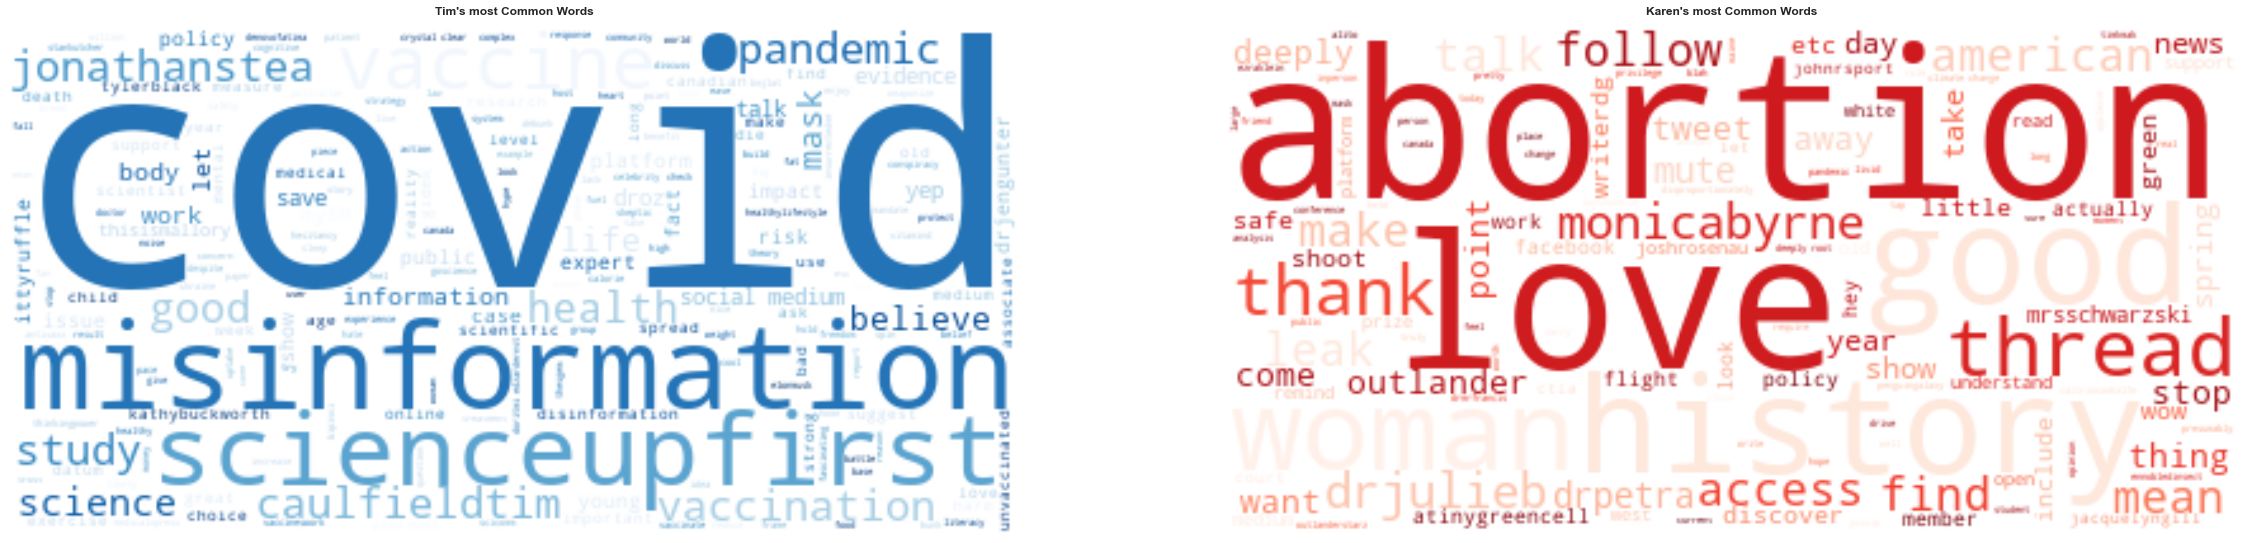

In [49]:
# Combine all tweets into one for each user
tim_full_words = ' '.join([sent for sent in df.loc[df.user == 'Timothy Caulfield', 'clean_tweets']])
karen_full_words = ' '.join([sent for sent in df.loc[df.user == 'Dr. Karen James', 'clean_tweets']])

# Initiate the WorldCloud
wc_tim = WordCloud(background_color="white", colormap="Blues", max_font_size=200, random_state=42) # blue color
wc_karen = WordCloud(background_color="white", colormap="Reds", max_font_size=200, random_state=42) # red color

# Function to display most common words
def plot_wordcloud(lists, titles, wc):
    
    fig, ax = plt.subplots(ncols = 2, figsize= (40,12))
    
    for indx, sents in enumerate(lists):
        wc[indx].generate(sents)
        ax[indx].imshow(wc[indx], interpolation = 'bilinear')
        ax[indx].axis('off')
        ax[indx].set_title(titles[indx], pad = 14, weight = 'bold')
    plt.show()

# Send user's tweets to the function
plot_wordcloud( lists  = [tim_full_words, karen_full_words],
                titles = ["Tim's most Common Words" , "Karen's most Common Words"],
                wc     = [wc_tim, wc_karen] )


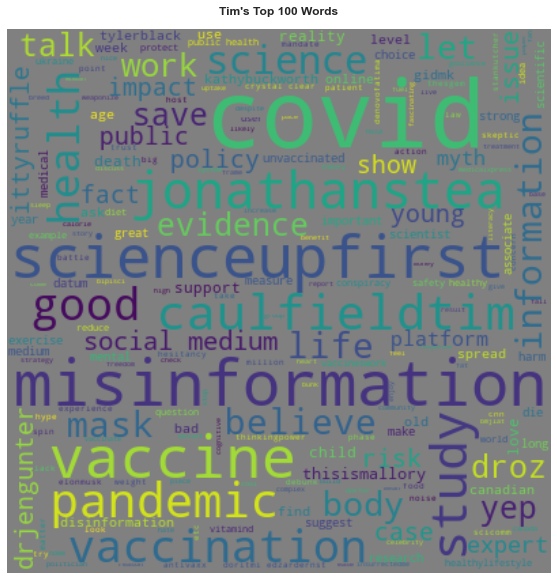

In [50]:
# Import the image to have it as mask
tim_mask = np.array(Image.open("timmm.png"))

# Initiate the wordcloud with the mask parameter
wc_msk = WordCloud(background_color="grey", mask = tim_mask)
wc_msk.generate(tim_full_words)

plt.figure(figsize= (35,10))

plt.imshow(wc_msk, interpolation = 'bilinear')
plt.axis('off')
plt.title("Tim's Top 100 Words", pad = 14, weight = 'bold')

plt.show()

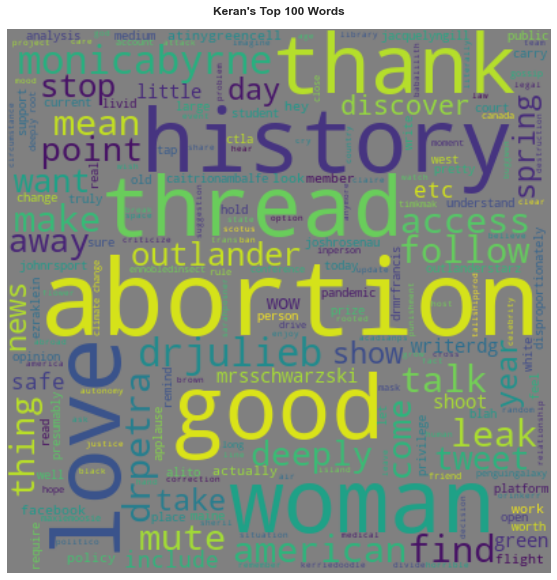

In [51]:
# Import the image to have it as mask
keran_mask = np.array(Image.open("karen.png"))

# Initiate the wordcloud with the mask parameter
wc_msk = WordCloud(background_color="grey", mask = keran_mask)
wc_msk.generate(karen_full_words)

plt.figure(figsize= (35,10))

plt.imshow(wc_msk, interpolation = 'bilinear')
plt.axis('off')
plt.title("Keran's Top 100 Words", pad = 14, weight = 'bold')

plt.show()

In [52]:
# Drop unwanted columns and convert user profile into numeric reps
df['profile'] = df.user.replace({'Dr. Karen James': 0, 'Timothy Caulfield': 1})
df.drop(['id', 'user', 'tweets', 'clean_tweets_SecondRound'], axis = 1, inplace = True)


In [53]:
df.to_pickle('Keran_And_Tim_Final.pickle')

In [54]:
df.to_csv('Karen_Timothy_Tweets2_Final.csv')

In [55]:
df = pd.read_pickle('Keran_And_Tim_Final.pickle')

In [56]:
df.head()

,date,favorite_counts,retweet_counts,hashtags,mentions,tweets_length,tweets_spaces,tweets_uppercase,tweets_punctuations,tweets_questionmark,tweets_exclamation_mark,polarity,subjectivity,polarity_status,subjectivity_status,is_neutral,is_positive,is_negative,part_of_day,is_early,is_morning,is_noon,is_evening,is_midnight,is_norp,is_time,is_org,is_gpe,is_loc,is_product,is_workart,is_fac,is_noun,is_pron,is_adv,is_propn,is_verb,is_intj,month,day,week_day,week_day_name,hour,clean_tweets,profile
0,2022-05-06 12:43:24+00:00,0,7,libraries,artefactors,126,20,4,4,0,0,0.30,0.50,Positive,Subjective,0,1,0,Early Morning,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,4,2,0,5,6,4,Friday,12,artefactor dundee library lend gardening tool fresh air lockdown library,0
1,2022-05-06 04:30:16+00:00,0,83,NaN,politico,140,23,11,4,0,0,0.05,0.31,Positive,Objective,0,1,0,Mid Night,0,0,0,0,1,0,0,2,0,0,0,0,0,4,1,0,10,0,0,5,6,4,Friday,4,politico karine jeanpierre white house press secretary black press secretary history,0
2,2022-05-06 01:35:35+00:00,1,0,NaN,"spacermase, AcadiaNPS",104,17,6,3,0,0,0.00,0.00,Neutral,Very Objective,1,0,0,Mid Night,0,0,0,0,1,0,0,0,0,0,0,0,0,3,4,3,0,3,0,5,6,4,Friday,1,spacermase acadianps grow west imagine spring,0
3,2022-05-06 01:13:45+00:00,2,0,NaN,birdturntable,54,8,1,1,0,0,0.00,0.00,Neutral,Very Objective,1,0,0,Mid Night,0,0,0,0,1,0,0,0,0,0,0,0,0,3,1,0,0,1,0,5,6,4,Friday,1,birdturntable nest porch year,0
4,2022-05-06 00:35:36+00:00,27,4,NaN,AcadiaNPS,164,27,10,7,0,0,0.00,0.00,Neutral,Very Objective,1,0,0,Mid Night,0,0,0,0,1,1,0,0,0,0,0,0,0,10,2,0,3,2,0,5,6,4,Friday,0,beaver swimming edge flood duck brook ⁦acadianps⁩ sight lodge bonus hear peeper pseudacris crucifer singing,0


# Using ML
#### Seperate features from labels
#### Seperate training and testing datasets
#### Vectorize tweets

In [57]:
def process_data(data, feature, target):
    
    shuf_df = shuffle(data)                             # Shuffle DataFrame
    shuf_df.reset_index(drop = True, inplace = True)    # Reset DataFrame index
    
    X = data[feature]
    y = data[target]
    
    return X, y

X, y = process_data( data    = df, 
                     feature = ['clean_tweets'], 
                     target  = ['profile'] )

In [58]:
# Split train, test dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [59]:
# Check shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.values.shape, X_test.values.shape, y_train.values.ravel().shape, y_test.values.ravel().shape)

(320, 1) (80, 1) (320, 1) (80, 1)
(320, 1) (80, 1) (320,) (80,)


In [60]:
# Initiate TFIDF Vect
tfidf_vect = TfidfVectorizer(ngram_range = (1,3), stop_words = 'english', sublinear_tf = True)

# Fit & transform the X_train
tfidfVect_train    = tfidf_vect.fit_transform(X_train.clean_tweets)
tfidfVect_train_df = pd.DataFrame(tfidfVect_train.toarray(), columns = tfidf_vect.get_feature_names())
# Transform the X_test
tfidfVect_test     = tfidf_vect.transform(X_test.clean_tweets)
tfidfVect_test_df  = pd.DataFrame(tfidfVect_test.toarray(), columns = tfidf_vect.get_feature_names())

/home/coder_ilyas/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/coder_ilyas/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Evluate Model

#### Evaluate models
#### Display results
#### Select best model based on Accuracy, Precision and F1 Score
#### Tune model's parameter using GridSearchCV
#### Train model on all dataset
#### Predict new tweets samples

In [61]:
# Initiate lists 
model_name_list = []
accuracyScore_list = []
recallScore_list = []
precisionScore_list = []
rocAucScore_list = []
f1Score_list = []

def evaluate_classifier(model, Xtrain, Xtest, ytrain, ytest):
    # Initiate the Naive Bayes 'MultinomialNB' classifier
    clf = model[1]

    # Fit classifier with the X_train_tfidf, y_train
    clf.fit(Xtrain, ytrain)

    # Store predicted values ub y_pred
    y_pred = clf.predict(Xtest)
    
    accuracyScore  = accuracy_score(ytest, y_pred)
    recallScore    = recall_score(ytest, y_pred)
    precisionScore = precision_score(ytest, y_pred)
    rocAucScore    = roc_auc_score(ytest, y_pred)
    f1Score        = f1_score(ytest, y_pred)

    model_name_list.append(model[0])
    accuracyScore_list.append(accuracyScore)
    recallScore_list.append(recallScore)
    precisionScore_list.append(precisionScore)
    rocAucScore_list.append(rocAucScore)
    f1Score_list.append(f1Score)
    
    print('Accuracy Score: {}\n\n'.format(round(accuracyScore * 100),1))

    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(ytest, y_pred), annot = True, xticklabels = ["Keran","Tim"], yticklabels = ["Tim", "Keran"])
    plt.show()

    print('\n\nClassification Report: \n{}\n'.format(classification_report(ytest, y_pred)))

Accuracy Score: 89


Confusion Matrix:


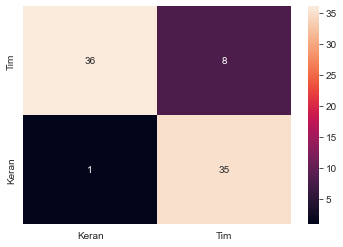



Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        44
           1       0.81      0.97      0.89        36

    accuracy                           0.89        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.89      0.89        80




In [62]:
# Evaluate Naive Bayes 'MultinomialNB' classifier
evaluate_classifier( model  = ['MultinomialNB', MultinomialNB(alpha= 0.01)], 
                     Xtrain = tfidfVect_train_df.values, 
                     Xtest  = tfidfVect_test_df.values, 
                     ytrain = y_train.values.ravel(), 
                     ytest  = y_test.values.ravel())

Accuracy Score: 86


Confusion Matrix:


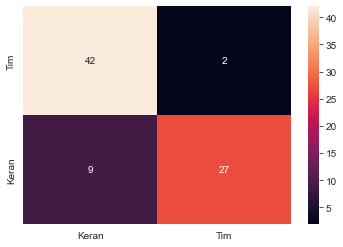



Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        44
           1       0.93      0.75      0.83        36

    accuracy                           0.86        80
   macro avg       0.88      0.85      0.86        80
weighted avg       0.87      0.86      0.86        80




In [63]:
# Evaluate XGBoost classifier
evaluate_classifier( model  = ['XGBoost', xgb.XGBClassifier(learning_rate = 0.5)], 
                     Xtrain = tfidfVect_train_df.values, 
                     Xtest  = tfidfVect_test_df.values, 
                     ytrain = y_train.values.ravel(), 
                     ytest  = y_test.values.ravel())

Accuracy Score: 64


Confusion Matrix:


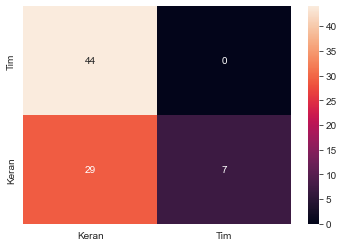



Classification Report: 
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        44
           1       1.00      0.19      0.33        36

    accuracy                           0.64        80
   macro avg       0.80      0.60      0.54        80
weighted avg       0.78      0.64      0.56        80




In [64]:
# Evaluate LightGBM classifier
evaluate_classifier( model  = ['LightGBM', lgb.LGBMClassifier(learning_rate = 0.5)], 
                     Xtrain = tfidfVect_train_df.values, 
                     Xtest  = tfidfVect_test_df.values, 
                     ytrain = y_train.values.ravel(), 
                     ytest  = y_test.values.ravel())

Accuracy Score: 91


Confusion Matrix:


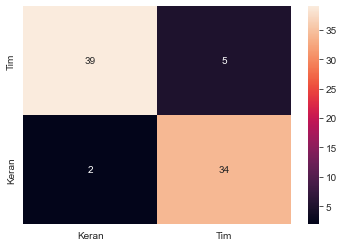



Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        44
           1       0.87      0.94      0.91        36

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80




In [65]:
# Evaluate LogisticRegression classifier
evaluate_classifier( model  = ['LogisticRegression', LogisticRegression()], 
                     Xtrain = tfidfVect_train_df.values, 
                     Xtest  = tfidfVect_test_df.values, 
                     ytrain = y_train.values.ravel(), 
                     ytest  = y_test.values.ravel())

Accuracy Score: 90


Confusion Matrix:


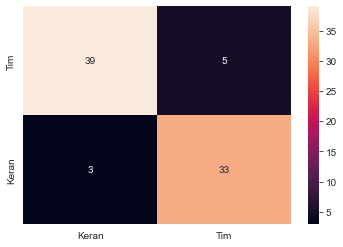



Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        44
           1       0.87      0.92      0.89        36

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80




In [66]:
# Evaluate SVC classifier
evaluate_classifier( model  = ['SVC', SVC(kernel = 'linear')], 
                     Xtrain = tfidfVect_train_df.values, 
                     Xtest  = tfidfVect_test_df.values, 
                     ytrain = y_train.values.ravel(), 
                     ytest  = y_test.values.ravel())

Accuracy Score: 89


Confusion Matrix:


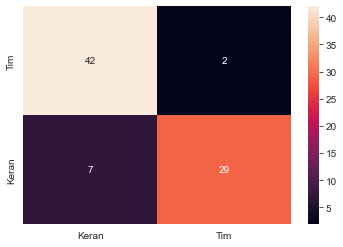



Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        44
           1       0.94      0.81      0.87        36

    accuracy                           0.89        80
   macro avg       0.90      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80




In [67]:
# Evaluate LinearSVC classifier
evaluate_classifier( model  = ['LinearSVC', LinearSVC(penalty = 'l1', dual = False)], 
                     Xtrain = tfidfVect_train_df.values, 
                     Xtest  = tfidfVect_test_df.values, 
                     ytrain = y_train.values.ravel(), 
                     ytest  = y_test.values.ravel())

In [68]:
# Assemble scores from lists to dataframe
def assemble_scores():

    results_dict = { 'Model': model_name_list,
                     'Accuracy_Score': accuracyScore_list,
                     'Recall_Score': recallScore_list,
                     'Precision_Score': precisionScore_list,
                     'ROC_AUC_Score': rocAucScore_list,
                     'F1_Score': f1Score_list }

    results_df = pd.DataFrame(results_dict)
    
    return results_df

# Call assemble_scoes function to assemble scores into dataframe
results_df = assemble_scores()

In [69]:
results_df

,Model,Accuracy_Score,Recall_Score,Precision_Score,ROC_AUC_Score,F1_Score
0,MultinomialNB,0.89,0.97,0.81,0.90,0.89
1,XGBoost,0.86,0.75,0.93,0.85,0.83
2,LightGBM,0.64,0.19,1.00,0.60,0.33
3,LogisticRegression,0.91,0.94,0.87,0.92,0.91
4,SVC,0.90,0.92,0.87,0.90,0.89
5,LinearSVC,0.89,0.81,0.94,0.88,0.87


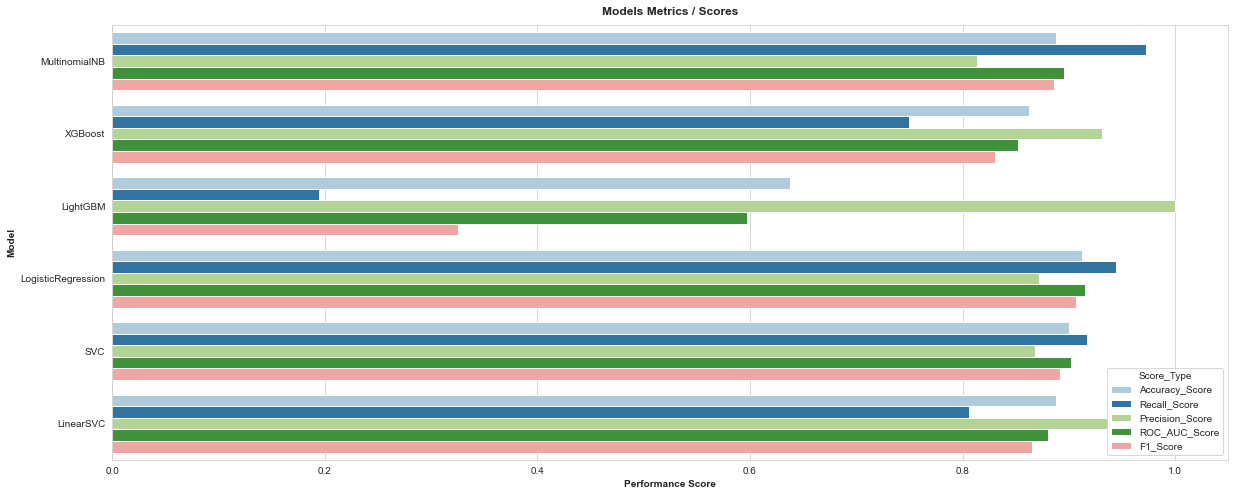

In [70]:
# Change the shape of the dataframe using pd.melt
results_melted_df = pd.melt(frame = results_df, id_vars = ['Model'], value_vars = ['Accuracy_Score', 'Recall_Score', 'Precision_Score', 'ROC_AUC_Score', 'F1_Score'], var_name = 'Score_Type', value_name = 'Score')

# Plot scores againt models
plt.figure(figsize= (20,8))

_ = sns.barplot( data = results_melted_df, x = 'Score', y = 'Model', hue = 'Score_Type', palette= "Paired")

_.set_title('Models Metrics / Scores', pad = 10, weight= 'bold')
_.set_xlabel('Performance Score', weight= 'bold')
_.set_ylabel('Model', weight= 'bold')

plt.show()